In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load Data
df = pd.read_csv('fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#Identify number of Classes (i.e. Species)
df.Species.unique()


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
#Key Statistics
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [29]:
# check for null values
print(df.isnull().sum())


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


<Axes: >

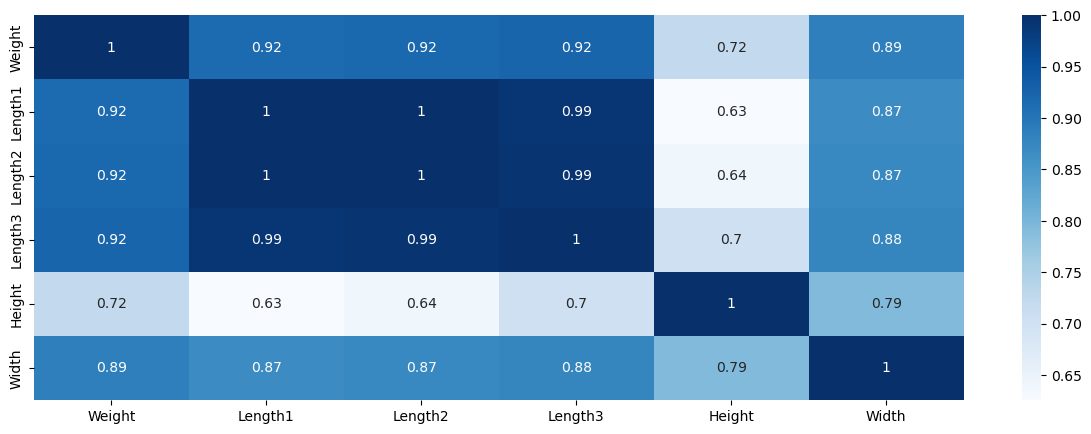

In [30]:
#Visualization of Correlations
df_numeric = df.drop(columns=['Species'])
fig = plt.figure(figsize=(15,5))
sns.heatmap(df_numeric.corr(),annot=True,cmap="Blues")

In [31]:
#Create x and y variables
X = df.drop('Species',axis=1).to_numpy()
y = df['Species'].to_numpy()

In [32]:
#Create Train and Test datasets  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)
#Scale the data 
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [33]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=100)

# Train the classifier
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)


In [34]:
# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
target_names = df['Species'].unique()
print(classification_report(y_test, y_pred, target_names=target_names))


Confusion Matrix:
[[ 7  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  3  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  1  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
       Roach       1.00      0.50      0.67         2
   Whitefish       0.73      1.00      0.85        11
      Parkki       1.00      1.00      1.00         4
       Perch       0.50      0.25      0.33         4
        Pike       1.00      1.00      1.00         3
       Smelt       0.00      0.00      0.00         1

    accuracy                           0.84        32
   macro avg       0.75      0.68      0.69        32
weighted avg       0.81      0.84      0.81        32



C:\Users\devik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\devik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
